In [84]:
import requests
import time

url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

years = [2022]  

for year in years:
    url = url_start.format(year)
    
    data = requests.get(url)
    with open("mvp/{}.html".format(year), "w+", encoding='utf-8', errors='ignore') as f:
        f.write(data.text)
    
    time.sleep(1)


Parsing the votes table with beautifulsoup

In [85]:
from bs4 import BeautifulSoup

In [86]:
with open("mvp/2020.html") as f:
    page = f.read()
    
soup = BeautifulSoup(page, 'html.parser')
soup.find('tr', class_="over_header").decompose()

In [87]:
mvp_table = soup.find_all(id="mvp")[0]

In [88]:
import pandas as pd

In [89]:
mvp_2020 = pd.read_html(str(mvp_table))[0]

In [90]:
mvp_2020.head(1)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Giannis Antetokounmpo,25,MIL,85.0,962.0,1010,0.952,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279


In [91]:
dfs = []
for year in years:
    with open("mvp/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find_all(id="mvp")[0]
    mvp_df = pd.read_html(str(mvp_table))[0]
    #create a year column
    mvp_df["Year"] = year
    dfs.append(mvp_df)

In [92]:
mvps = pd.concat(dfs)

mvps.tail()


,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
7,8,Stephen Curry,33,GSW,0.0,4.0,1000,0.004,64,34.5,...,5.2,6.3,1.3,0.4,0.437,0.380,0.923,8.0,0.173,2022
8,9,Chris Paul,36,PHO,0.0,2.0,1000,0.002,65,32.9,...,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,2022
9,10T,DeMar DeRozan,32,CHI,0.0,1.0,1000,0.001,76,36.1,...,5.2,4.9,0.9,0.3,0.504,0.352,0.877,8.8,0.154,2022
10,10T,Kevin Durant,33,BRK,0.0,1.0,1000,0.001,55,37.2,...,7.4,6.4,0.9,0.9,0.518,0.383,0.910,8.4,0.198,2022
11,10T,LeBron James,37,LAL,0.0,1.0,1000,0.001,56,37.2,...,8.2,6.2,1.3,1.1,0.524,0.359,0.756,7.5,0.172,2022


In [93]:
# Replace incorrect instances of Luka Dončić's name
mvps['Player'] = mvps['Player'].str.replace('Luka Don膷i膰', 'Luka Dončić', regex=False)
mvps['Player'] = mvps['Player'].str.replace('Nikola Joki膰', 'Nikola Jokić', regex=False)



# Save the DataFrame to a CSV file with UTF-8 encoding
mvps.to_csv("mvps.csv", encoding='utf-8-sig', index=False)




Downloading team stats part1 from website

In [94]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

for year in years:
    url = team_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("team/{}.html".format(year), "w+", encoding='utf-8', errors='ignore') as f:
        f.write(data.text)
time.sleep(1)

In [95]:
dfs = []
for year in years:
    with open("team/{}.html".format(year)) as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    e_table = soup.find_all(id="divs_standings_E")[0]
    e_df = pd.read_html(str(e_table))[0]
    e_df["Year"] = year
    e_df["Team"] = e_df["Eastern Conference"]
    del e_df["Eastern Conference"]
    dfs.append(e_df)
    
    w_table = soup.find_all(id="divs_standings_W")[0]
    w_df = pd.read_html(str(w_table))[0]
    w_df["Year"] = year
    w_df["Team"] = w_df["Western Conference"]
    del w_df["Western Conference"]
    dfs.append(w_df)


In [96]:
teams = pd.concat(dfs)


In [97]:
teams.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,51,31,.622,—,111.8,104.5,7.02,2022,Boston Celtics*
1,51,31,.622,—,109.9,107.3,2.57,2022,Philadelphia 76ers*
2,48,34,.585,3.0,109.4,107.1,2.38,2022,Toronto Raptors*
3,44,38,.537,7.0,112.9,112.1,0.82,2022,Brooklyn Nets*
4,37,45,.451,14.0,106.5,106.6,-0.01,2022,New York Knicks


In [98]:
teams.tail()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies*
14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks*
15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans*
16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs
17,20,62,.244,36.0,109.7,118.2,-8.26,2022,Houston Rockets


In [99]:
teams.to_csv("teams.csv")

This is the second part of the NBA Team Data (From balldontlie api)

In [100]:
import requests
import csv
def fetch_nba_teams(api_key):
    """Fetches NBA team data using the BallDontLie API."""
    url = 'https://api.balldontlie.io/v1/teams'
    headers = {'Authorization': api_key}  
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()['data']
    else:
        print(f"Failed to fetch data: {response.status_code}, {response.text}")
        return []

def save_teams_to_csv(teams, filename):
    """Saves a list of NBA teams to a CSV file."""
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['ID', 'Conference', 'Division', 'City', 'Name', 'Full Name', 'Abbreviation'])
        for team in teams:
            writer.writerow([team['id'], team['conference'], team['division'], team['city'], team['name'], team['full_name'], team['abbreviation']])

# Main! 
api_key = '0896690f-8ed5-4825-83d3-b618bf8f883f'  # My api key
nba_teams = fetch_nba_teams(api_key)
if nba_teams:
    save_teams_to_csv(nba_teams, 'nba_teams.csv')

In [101]:
mvp_df = pd.read_csv('mvps.csv')

In [102]:
team_stats_df = pd.read_csv('teams.csv')
team_stats_df.drop(columns=['Unnamed: 0'], inplace=True)

team_stats_df2 = pd.read_csv('nba_teams.csv')
# Renaming 'Full Name' to 'Team'
team_stats_df2.rename(columns={'Full Name': 'Team'}, inplace=True)
# Remove asterisks from the 'Team' column
# Remove asterisks from the 'Team' column, escaping the asterisk
team_stats_df['Team'] = team_stats_df['Team'].str.replace(r'\*', '', regex=True)


print(team_stats_df.head())
print(team_stats_df2.head())

    W   L  W/L%    GB   PS/G   PA/G    SRS  Year                Team
0  51  31  .622     —  111.8  104.5   7.02  2022      Boston Celtics
1  51  31  .622     —  109.9  107.3   2.57  2022  Philadelphia 76ers
2  48  34  .585   3.0  109.4  107.1   2.38  2022     Toronto Raptors
3  44  38  .537   7.0  112.9  112.1   0.82  2022       Brooklyn Nets
4  37  45  .451  14.0  106.5  106.6  -0.01  2022     New York Knicks
   ID Conference   Division       City     Name               Team  \
0   1       East  Southeast    Atlanta    Hawks      Atlanta Hawks   
1   2       East   Atlantic     Boston  Celtics     Boston Celtics   
2   3       East   Atlantic   Brooklyn     Nets      Brooklyn Nets   
3   4       East  Southeast  Charlotte  Hornets  Charlotte Hornets   
4   5       East    Central    Chicago    Bulls      Chicago Bulls   

  Abbreviation  
0          ATL  
1          BOS  
2          BKN  
3          CHA  
4          CHI  


In [103]:
# Merging the DataFrames on the 'Team' column
NBATeam_df = pd.merge(team_stats_df, team_stats_df2, on='Team', how='inner')
#combined_df.drop(combined_df.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)

print(NBATeam_df.head())

    W   L  W/L%    GB   PS/G   PA/G    SRS  Year                Team  ID  \
0  51  31  .622     —  111.8  104.5   7.02  2022      Boston Celtics   2   
1  51  31  .622     —  109.9  107.3   2.57  2022  Philadelphia 76ers  23   
2  48  34  .585   3.0  109.4  107.1   2.38  2022     Toronto Raptors  28   
3  44  38  .537   7.0  112.9  112.1   0.82  2022       Brooklyn Nets   3   
4  37  45  .451  14.0  106.5  106.6  -0.01  2022     New York Knicks  20   

  Conference  Division          City     Name Abbreviation  
0       East  Atlantic        Boston  Celtics          BOS  
1       East  Atlantic  Philadelphia    76ers          PHI  
2       East  Atlantic       Toronto  Raptors          TOR  
3       East  Atlantic      Brooklyn     Nets          BKN  
4       East  Atlantic      New York   Knicks          NYK  


In [104]:
# Save the DataFrame to a CSV file
NBATeam_df.to_csv('NBATeam_df.csv', index=False)


In [105]:

#combined1_df = pd.merge(mvp_df, NBATeam_df, on='Year', how='inner')
# Print the number of rows in the combined dataset
#print("Number of rows in the combined dataset:", combined1_df.shape[0])
# Print the number of columns in the combined dataset
#print("Number of columns in the combined dataset:", combined1_df.shape[1])
# Print the names of all columns in the combined dataset
#print("Column names in the combined dataset:", combined1_df.columns.tolist())






Bring in salary dataset

In [106]:
salary_df = pd.read_csv('nba_2022-23_all_stats_with_salary.csv')
salary_df['Year'] = 2022
salary_df.rename(columns={'Player Name': 'Player'}, inplace=True)




In [107]:
# This will show the first 5 rows, including the new 'Year' column
print(salary_df.head())
salary_df.to_csv('nba_2022-23_all_stats_with_salary_with_year.csv', index=False)


   Unnamed: 0             Player    Salary Position  Age     Team  GP  GS  \
0           0      Stephen Curry  48070014       PG   34      GSW  56  56   
1           1          John Wall  47345760       PG   32      LAC  34   3   
2           2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24   
3           3       LeBron James  44474988       PF   38      LAL  55  54   
4           4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47   

     MP    FG  ...  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  Year  
0  34.7  10.0  ...  31.0  5.8  2.0  7.8  0.192   7.5   0.1  7.5   4.7  2022  
1  22.2   4.1  ...  27.0 -0.4  0.7  0.3  0.020  -0.8  -0.4 -1.2   0.1  2022  
2  29.1   5.9  ...  27.7 -0.6  2.6  1.9  0.044   0.3  -0.1  0.2   1.2  2022  
3  35.5  11.1  ...  33.3  3.2  2.4  5.6  0.138   5.5   0.6  6.1   4.0  2022  
4  35.6  10.3  ...  30.7  4.7  2.1  6.8  0.194   6.0   1.2  7.1   3.9  2022  

[5 rows x 53 columns]


combine 3 dataset

In [108]:
# Ensure 'Player' columns match
mvps['Player'] = mvps['Player'].str.strip().str.title()
salary_df['Player'] = salary_df['Player'].str.strip().str.title()

# If 'Year' is present in both, also ensure it is consistently formatted
if 'Year' in mvps.columns and 'Year' in salary_df.columns:
    mvps['Year'] = mvps['Year'].astype(int)
    salary_df['Year'] = salary_df['Year'].astype(int)



In [109]:
# Merge on 'Player' and 'Year' if 'Year' is present
if 'Year' in salary_df.columns:
    combined_df = pd.merge(mvps, salary_df, on=['Player', 'Year'], how='inner')
else:
    combined_df = pd.merge(mvps, salary_df, on='Player', how='inner')


In [110]:
print(combined_df.head())


  Rank                 Player  Age_x   Tm  First  Pts Won  Pts Max  Share   G  \
0    2            Joel Embiid     27  PHI   26.0    706.0     1000  0.706  68   
1    3  Giannis Antetokounmpo     27  MIL    9.0    595.0     1000  0.595  67   
2    4           Devin Booker     25  PHO    0.0    216.0     1000  0.216  68   
3    6           Jayson Tatum     23  BOS    0.0     43.0     1000  0.043  76   
4    7              Ja Morant     22  MEM    0.0     10.0     1000  0.010  57   

   MP_x  ...  TOV%  USG%  OWS  DWS  WS_y  WS/48_y  OBPM  DBPM  BPM  VORP  
0  33.8  ...  11.9  37.0  8.4  3.9  12.3    0.259   6.8   2.3  9.2   6.4  
1  32.9  ...  13.2  38.8  4.9  3.7   8.6    0.204   5.8   2.7  8.5   5.4  
2  34.5  ...  10.6  31.8  4.2  1.9   6.0    0.157   4.5  -0.3  4.2   2.9  
3  35.9  ...  10.4  32.7  6.2  4.3  10.5    0.185   4.8   0.7  5.5   5.1  
4  33.1  ...  12.6  34.9  3.4  2.6   6.0    0.148   5.2   0.5  5.7   3.8  

[5 rows x 72 columns]


In [111]:
combined_df.to_csv('merged_mvps_salary.csv', index=False)


In [112]:
# Merge combined_df with NBATeam_df

NBATeam_df.rename(columns={'Abbreviation': 'Tm'}, inplace=True)
# Assuming your DataFrame is named df
NBATeam_df['Tm'] = NBATeam_df['Tm'].replace('BKN', 'BRK')
NBATeam_df['Tm'] = NBATeam_df['Tm'].replace('PHX', 'PHO')


# Verify the change by checking unique values in the 'Tm' column




final_df = pd.merge(combined_df, NBATeam_df, on=['Tm', 'Year'], how='inner')  # or 'left', depending on data coverage


In [113]:
print(final_df.head())
print("Number of rows:", final_df.shape[0])
print("Number of columns:", final_df.shape[1])
print("Columns:", final_df.columns.tolist())


  Rank                 Player  Age_x   Tm  First  Pts Won  Pts Max  Share   G  \
0    2            Joel Embiid     27  PHI   26.0    706.0     1000  0.706  68   
1    3  Giannis Antetokounmpo     27  MIL    9.0    595.0     1000  0.595  67   
2    4           Devin Booker     25  PHO    0.0    216.0     1000  0.216  68   
3    9             Chris Paul     36  PHO    0.0      2.0     1000  0.002  65   
4    6           Jayson Tatum     23  BOS    0.0     43.0     1000  0.043  76   

   MP_x  ...  GB   PS/G   PA/G   SRS              Team_y  ID  Conference  \
0  33.8  ...   —  109.9  107.3  2.57  Philadelphia 76ers  23        East   
1  32.9  ...   —  115.5  112.1  3.22     Milwaukee Bucks  17        East   
2  34.5  ...   —  114.8  107.3  6.94        Phoenix Suns  24        West   
3  32.9  ...   —  114.8  107.3  6.94        Phoenix Suns  24        West   
4  35.9  ...   —  111.8  104.5  7.02      Boston Celtics   2        East   

   Division          City     Name  
0  Atlantic  Philad

In [114]:
# Assuming your final merged DataFrame is named 'final_df'
final_df.to_csv('final_merged_data.csv', index=False)


DATA CLEANING

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
#columns_to_remove = ['First', 'Pts Won', 'Pts Max', 'Share', 'Age_x', 'Tm', 'MP_x', 'Unnamed: 0', 'ID', 'Conference', 'Division', 'City', 'Name','GB','WS_y', 'WS/48_y','STL_y', 'BLK_y','3P%_y','FT%_y','FG%_y','MP_y','TRB_y', 'AST_y','Age_y', 'PTS_y','Team_y']
final_df = final_df.drop(columns_to_remove, axis=1)

# Confirm removal
print(final_df.columns)

Index(['Rank', 'Player', 'G', 'PTS_x', 'TRB_x', 'AST_x', 'STL_x', 'BLK_x',
       'FG%_x', '3P%_x', 'FT%_x', 'WS_x', 'WS/48_x', 'Year', 'Salary',
       'Position', 'Team_x', 'GP', 'GS', 'FG', 'FGA', '3P', '3PA', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'ORB', 'DRB', 'TOV', 'PF', 'Total Minutes',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'W', 'L', 'W/L%', 'PS/G', 'PA/G', 'SRS'],
      dtype='object')


In [116]:
final_df['Rank'] = final_df['Rank'].replace('10T', 10)
final_df['Rank'] = pd.to_numeric(final_df['Rank'])
final_df['Rank']


0     2
1     3
2     4
3     9
4     6
5     7
6     8
7    10
8    10
9    10
Name: Rank, dtype: int64

In [117]:
print(final_df.head())

   Rank                 Player   G  PTS_x  TRB_x  AST_x  STL_x  BLK_x  FG%_x  \
0     2            Joel Embiid  68   30.6   11.7    4.2    1.1    1.5  0.499   
1     3  Giannis Antetokounmpo  67   29.9   11.6    5.8    1.1    1.4  0.553   
2     4           Devin Booker  68   26.8    5.0    4.8    1.1    0.4  0.466   
3     9             Chris Paul  65   14.7    4.4   10.8    1.9    0.3  0.493   
4     6           Jayson Tatum  76   26.9    8.0    4.4    1.0    0.6  0.453   

   3P%_x  ...  OBPM  DBPM  BPM  VORP   W   L  W/L%   PS/G   PA/G   SRS  
0  0.371  ...   6.8   2.3  9.2   6.4  51  31  .622  109.9  107.3  2.57  
1  0.293  ...   5.8   2.7  8.5   5.4  51  31  .622  115.5  112.1  3.22  
2  0.383  ...   4.5  -0.3  4.2   2.9  64  18  .780  114.8  107.3  6.94  
3  0.317  ...   2.0   1.2  3.2   2.5  64  18  .780  114.8  107.3  6.94  
4  0.353  ...   4.8   0.7  5.5   5.1  51  31  .622  111.8  104.5  7.02  

[5 rows x 58 columns]


In [118]:
print(final_df.isnull().sum())

Rank             0
Player           0
G                0
PTS_x            0
TRB_x            0
AST_x            0
STL_x            0
BLK_x            0
FG%_x            0
3P%_x            0
FT%_x            0
WS_x             0
WS/48_x          0
Year             0
Salary           0
Position         0
Team_x           0
GP               0
GS               0
FG               0
FGA              0
3P               0
3PA              0
2P               0
2PA              0
2P%              0
eFG%             0
FT               0
FTA              0
ORB              0
DRB              0
TOV              0
PF               0
Total Minutes    0
PER              0
TS%              0
3PAr             0
FTr              0
ORB%             0
DRB%             0
TRB%             0
AST%             0
STL%             0
BLK%             0
TOV%             0
USG%             0
OWS              0
DWS              0
OBPM             0
DBPM             0
BPM              0
VORP             0
W           

There is no missing value in the dataset!


In [119]:
print(final_df.duplicated().sum())

0


There is no duplicates !

In [120]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           10 non-null     int64  
 1   Player         10 non-null     object 
 2   G              10 non-null     int64  
 3   PTS_x          10 non-null     float64
 4   TRB_x          10 non-null     float64
 5   AST_x          10 non-null     float64
 6   STL_x          10 non-null     float64
 7   BLK_x          10 non-null     float64
 8   FG%_x          10 non-null     float64
 9   3P%_x          10 non-null     float64
 10  FT%_x          10 non-null     float64
 11  WS_x           10 non-null     float64
 12  WS/48_x        10 non-null     float64
 13  Year           10 non-null     int32  
 14  Salary         10 non-null     int64  
 15  Position       10 non-null     object 
 16  Team_x         10 non-null     object 
 17  GP             10 non-null     int64  
 18  GS           

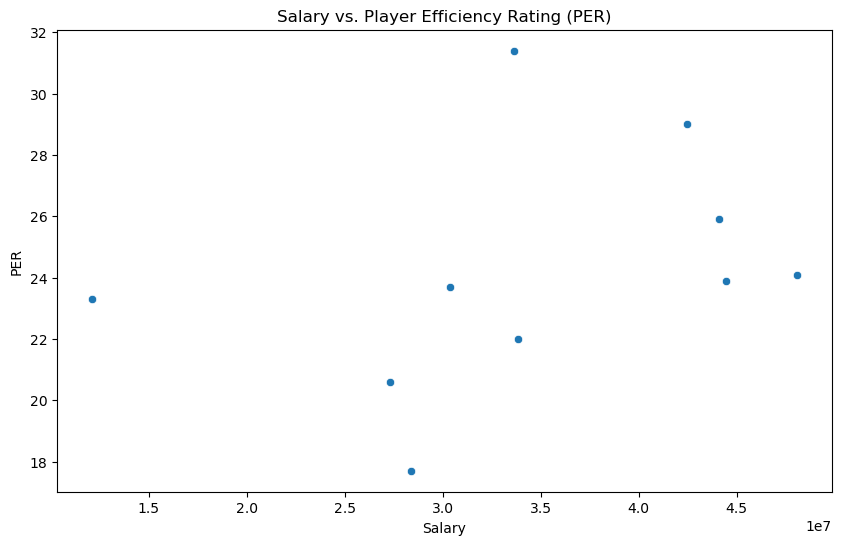

Correlation Matrix:
           Salary       PER
Salary  1.000000  0.349105
PER     0.349105  1.000000
                            OLS Regression Results                            
Dep. Variable:                    PER   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     2.678
Date:                Sat, 27 Apr 2024   Prob (F-statistic):              0.141
Time:                        18:19:19   Log-Likelihood:                -23.099
No. Observations:                  10   AIC:                             54.20
Df Residuals:                       6   BIC:                             55.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Salary vs. Performance metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='PER', data=final_df)
plt.title('Salary vs. Player Efficiency Rating (PER)')
plt.xlabel('Salary')
plt.ylabel('PER')
plt.show()

# Correlation
correlation = final_df[['Salary', 'PER']].corr()
print("Correlation Matrix:\n", correlation)

# Multiple regression analysis
X = final_df[['Salary', 'PTS_x', 'FG%_x']]  # include more metrics as needed
X = sm.add_constant(X)
y = final_df['PER']

model = sm.OLS(y, X).fit()
print(model.summary())



The correlation matrix indicates a coefficient of approximately 0.349 between salary and PER. This suggests a modest positive correlation, meaning as salary increases, PER also tends to increase, but it's not a strong relationship.

In [122]:
final_df.to_csv('final_merged_data.csv', index=False)

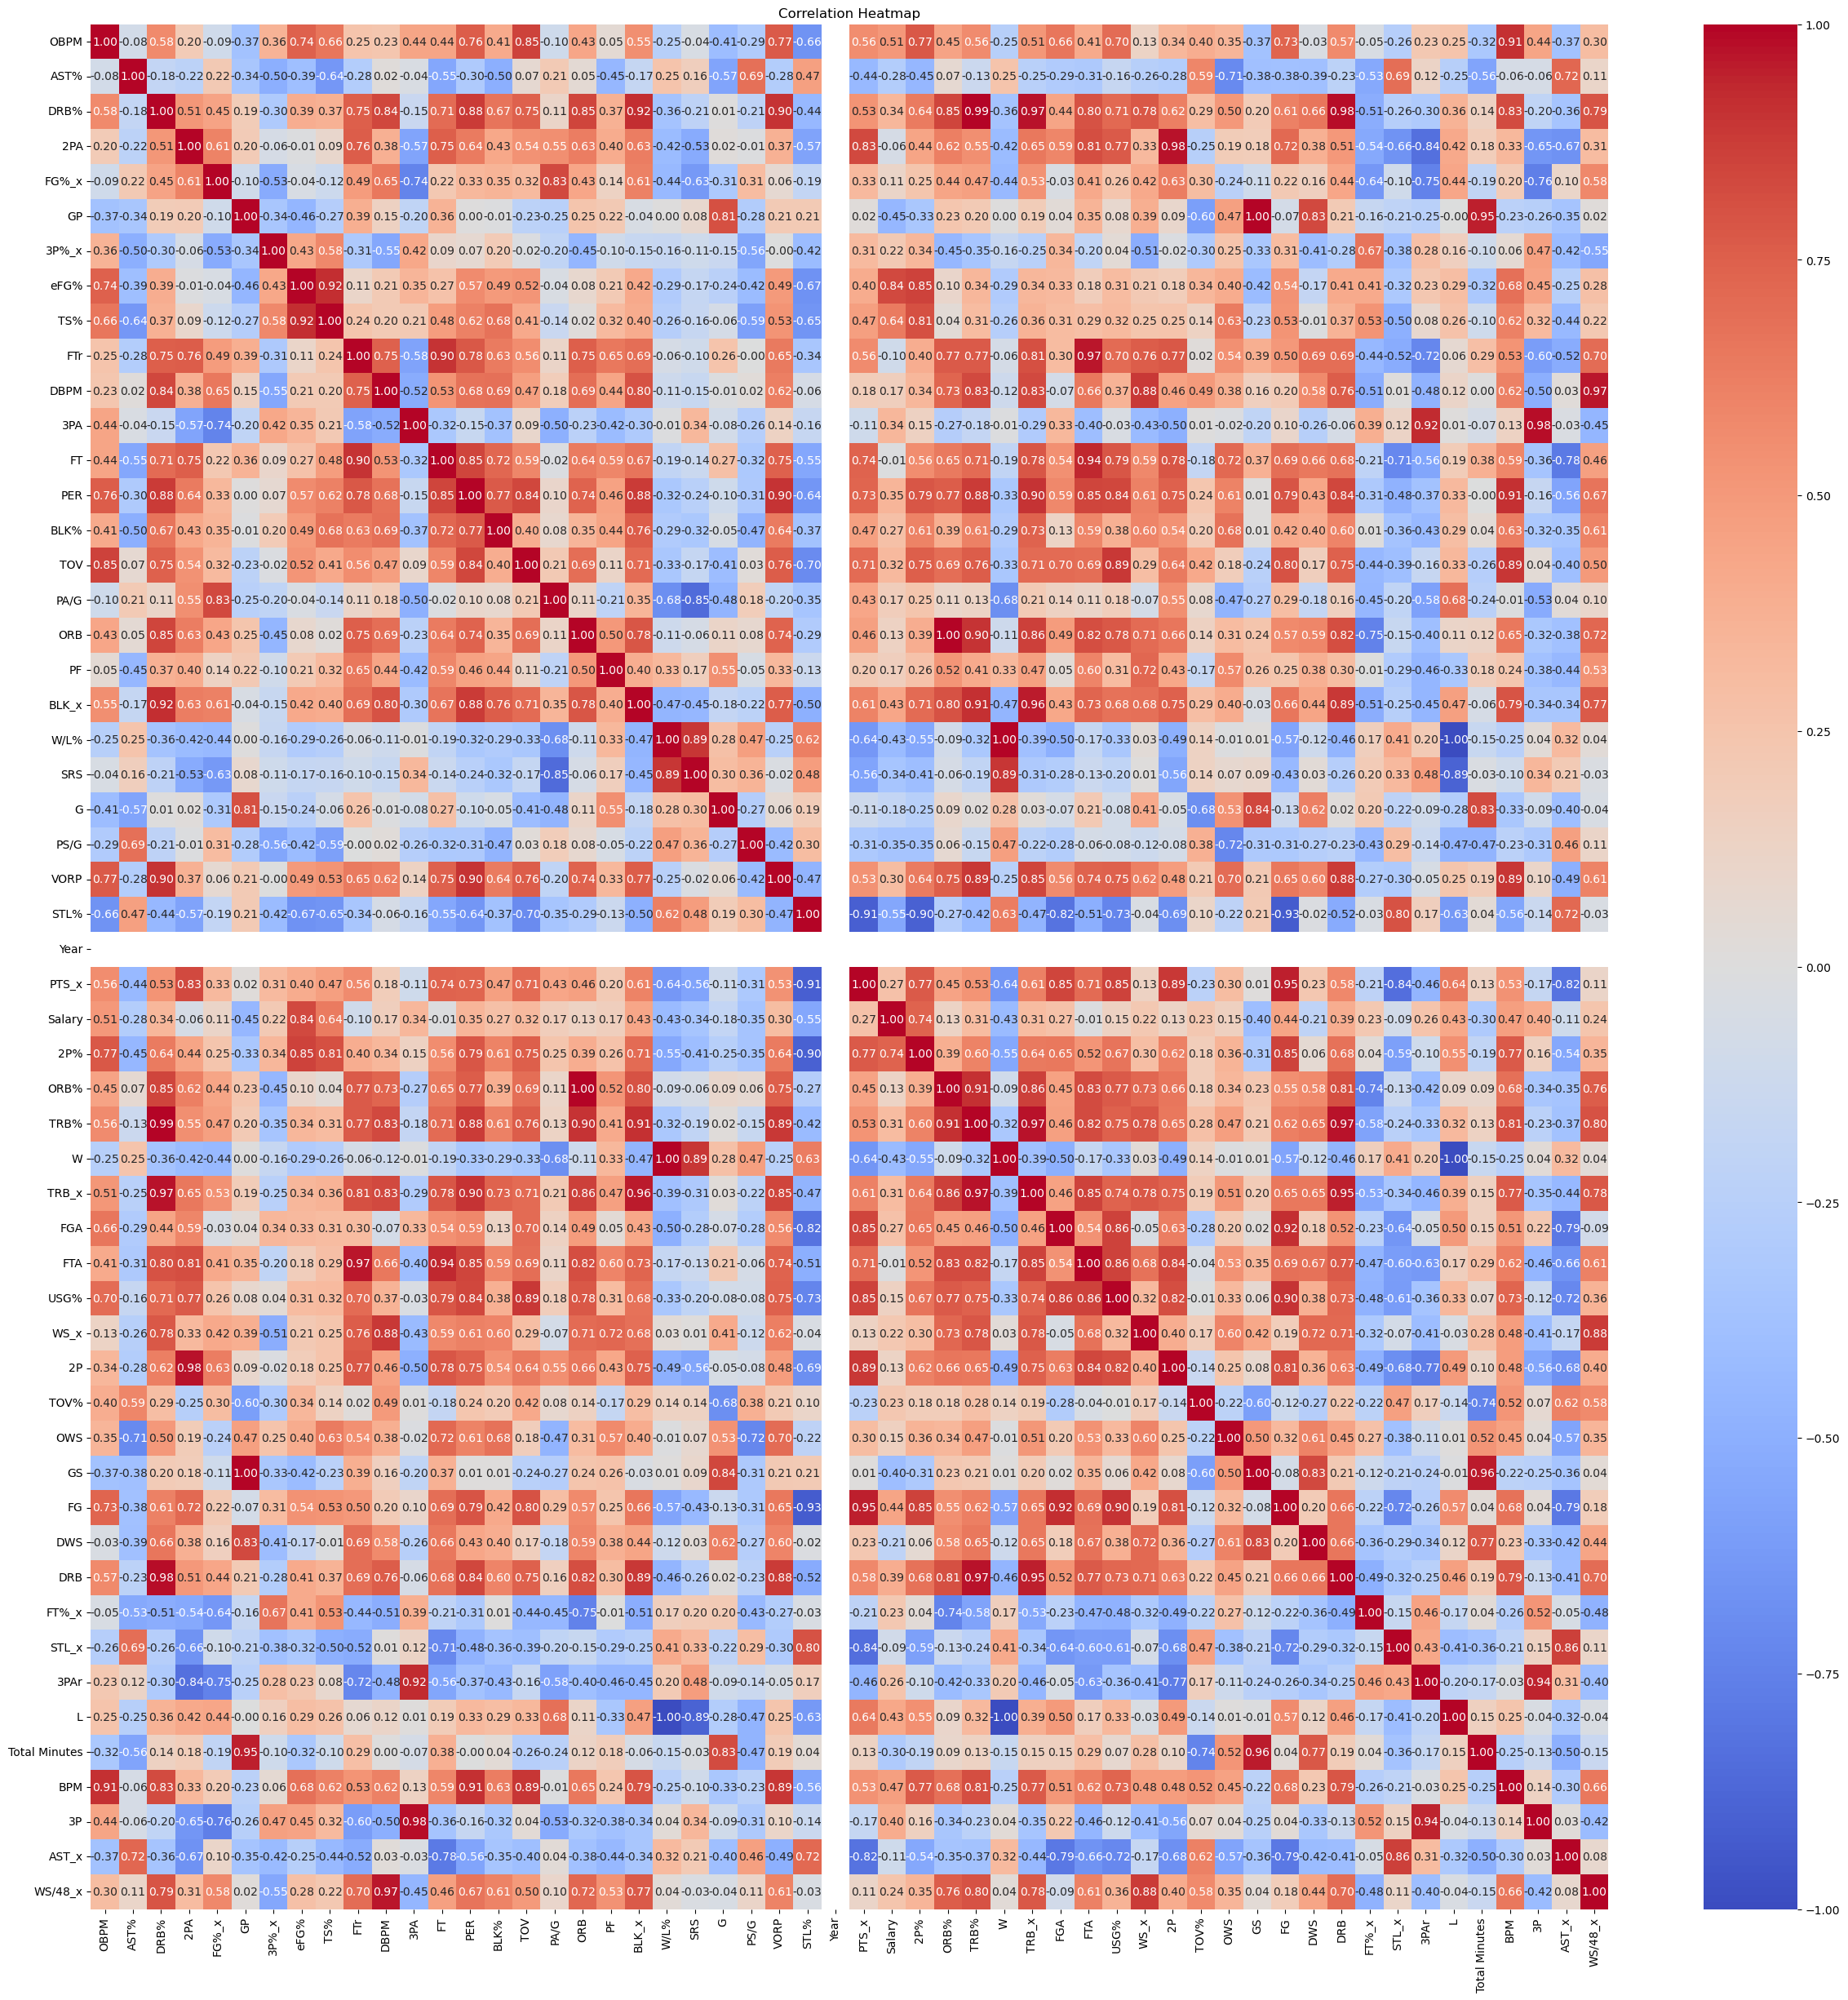

In [123]:
# Let's attempt to correct the issue one more time.
# First, we need to ensure all the columns that should be numeric are indeed in the correct format.
# The provided column names will be used to select and convert to numeric, ensuring that all data for the heatmap is appropriate.

# Converting all columns except 'Rank', 'Player', 'Position', 'Team_x' to numeric as these are expected to be non-numeric
numeric_columns = list(set(final_df.columns) - {'Rank', 'Player', 'Position', 'Team_x'})

# Convert columns to numeric and coerce errors, which will turn non-convertible values into NaN
for column in numeric_columns:
    final_df[column] = pd.to_numeric(final_df[column], errors='coerce')

# Drop rows with NaN values in any of the columns, as they would interfere with correlation calculation
final_df_cleaned = final_df.dropna(subset=numeric_columns)

# Now we can calculate the correlation matrix
corr_matrix = final_df_cleaned[numeric_columns].corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(30, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", ax=ax)

# Set title
ax.set_title('Correlation Heatmap')

# Show the heatmap
plt.show()



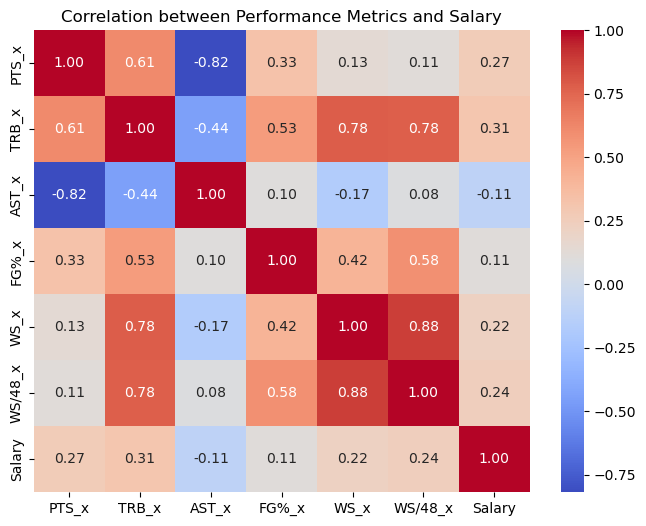

In [124]:
# Calculate the correlation matrix
corr = final_df[['PTS_x', 'TRB_x', 'AST_x', 'FG%_x', 'WS_x', 'WS/48_x', 'Salary']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Set the title
plt.title('Correlation between Performance Metrics and Salary')

# Show the plot
plt.show()

PTS_x (points per game) and salary: The correlation coefficient is 0.27, indicating a positive but weak relationship. Players who score more points tend to be paid a bit more, but this is not a strong predictor.
TRB_x (Total Rebounds) and Salary: the correlation is 0.31, which is also positive and weak. Players with more rebounds tend to make more, but again, other factors may affect salary to a greater extent.
AST_x (assists) and salary: the correlation is -0.11, indicating a very weak inverse relationship. This means that higher assists do not have a strong correlation with higher salaries.
The correlation between FG%_x (shooting percentage) and Salary: 0.11 is weakly positive, suggesting that players who shoot more efficiently don't necessarily earn more than those who are less efficient.
WS_x (win share) and salary: the correlation coefficient is 0.22, a weak positive correlation. Players who contribute more to their team's wins tend to be paid slightly more.
WS/48_x (share of wins per 48 minutes) and salary: the correlation coefficient is 0.24, similar to WS_x. It shows a weak but positive relationship, suggesting that players who are more efficient per minute tend to be paid slightly more.

Overall, these correlations suggest that while there is a relationship between a player's on-field performance and their salary, the relationship is not particularly strong. Salaries may be affected by a variety of factors, including, but not limited to, performance statistics. Other factors, such as a player's marketability, the team's financial situation, a player's draft status, tenure in the league and development potential, may also play a role in determining salary.

The weak correlation also hints at the complexity of salary negotiations, where performance may be just one of many considerations. Players may also be rewarded for their potential or past performance rather than their current statistics.

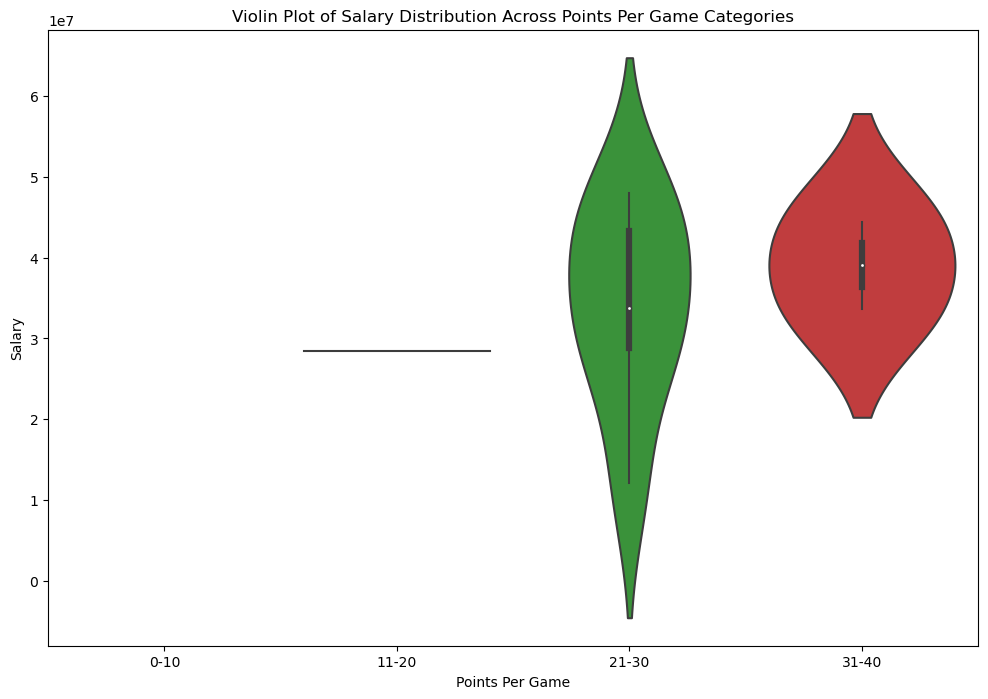

In [125]:
bins = [0, 10, 20, 30, 40]
labels = ['0-10', '11-20', '21-30', '31-40']
final_df['PTS_x_category'] = pd.cut(final_df['PTS_x'], bins=bins, labels=labels, include_lowest=True)

# Now generate the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='PTS_x_category', y='Salary', data=final_df)

# Set the title and labels
plt.title('Violin Plot of Salary Distribution Across Points Per Game Categories')
plt.xlabel('Points Per Game')
plt.ylabel('Salary')

# Show the plot
plt.show()

points 0-10 and 11-20 (points per game): The salary distributions for these two groups are similar, with a wide range indicating differences in the salaries of players in these scoring bands. There appears to be little difference in median salaries between these two groups.

points 21-30: The median salary is significantly higher and the top of the salary distribution is slightly narrower compared to the previous groups. This suggests that players with scoring averages between 21-30 points per game tend to have higher salaries. However, the distribution is still quite broad, suggesting that there is a great deal of variation within the group.

points 31-40 Points: The distribution is significantly different from the other groups, with a narrower shape, suggesting less variation in salaries. This group has the highest median salary, reflecting the fact that the top scorers in this group are among the highest paid players.


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


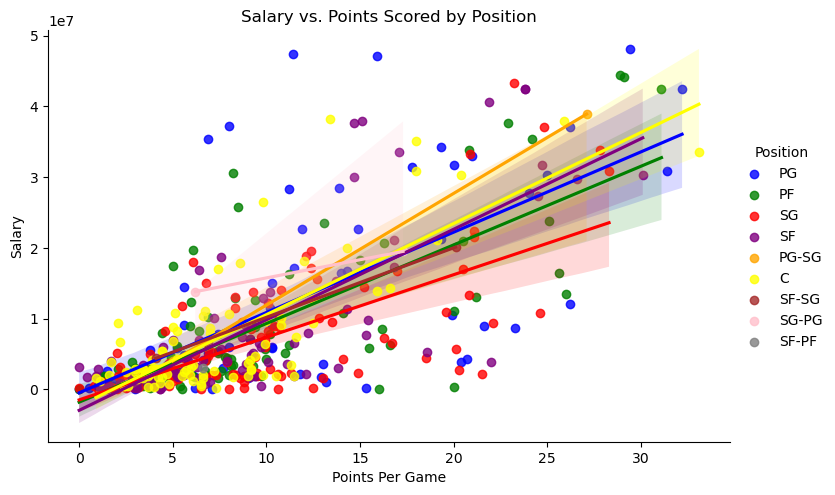

In [146]:
palette = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'gray', 'cyan']
sns.lmplot(x='PTS', y='Salary', data=df2, hue='Position', palette=palette, aspect=1.5)
plt.title('Salary vs. Points Scored by Position')
plt.xlabel('Points Per Game')
plt.ylabel('Salary')
plt.show()


As we can see, there's a positive correlation between 'Points Per Game' and 'Salary' across different positions, as evidenced by the upward trajectory of the regression lines. This indicates that players who score more generally earn higher salaries.
Salary Cap and Maximum Contracts: The ceiling on the higher salaries could be due to salary cap restrictions or max contract amounts, which prevent salaries from rising indefinitely with points scored.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


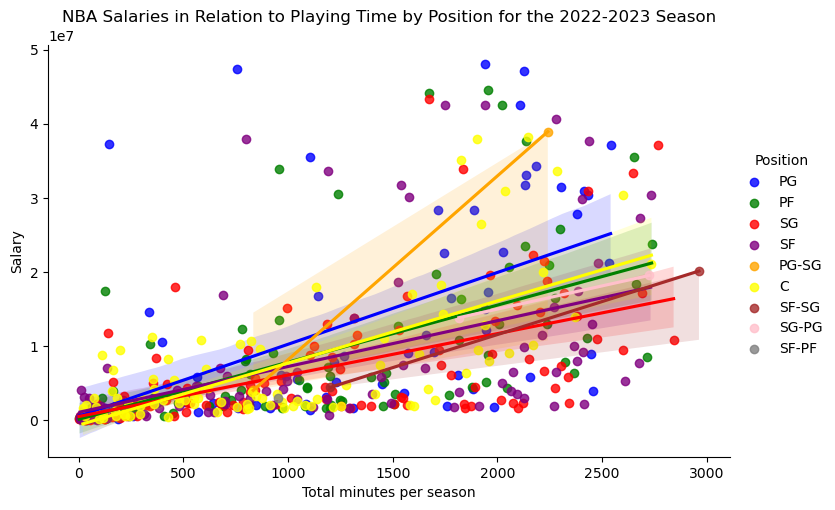

In [149]:
palette = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'gray', 'cyan']
sns.lmplot(x='Total Minutes', y='Salary', data=df2, hue='Position', palette=palette, aspect=1.5)
plt.xlabel('Total minutes per season')
plt.ylabel('Salary')
plt.title('NBA Salaries in Relation to Playing Time by Position for the 2022-2023 Season')
plt.show()

Similar to the points per game analysis, there seems to be a positive trend between the total minutes played and the player's salary. Players who have more minutes on the court generally earn higher salaries, which suggests that players who are central to the gameplay and are frequently utilized are valued higher.
This visualization reinforces the idea that on-court time is an important factor in player compensation, but not the only one. 

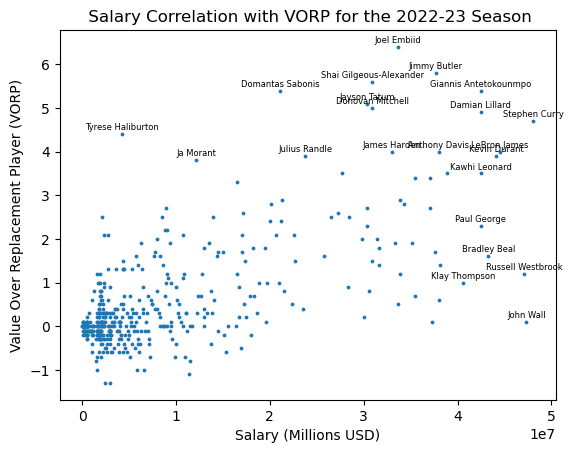

In [167]:
plt.clf()
plt.scatter(x=df2["Salary"], y=df2["VORP"], marker='o', s=3)
plt.xlabel('Salary (Millions USD)')
plt.ylabel('Value Over Replacement Player (VORP)')
plt.title(' Salary Correlation with VORP for the 2022-23 Season')

for i, row in df2.iterrows():
    if row["VORP"] > 3.6 or row["Salary"] > 40000000:
        plt.annotate(row['Player'], (row['Salary'], row['VORP']), textcoords='offset points', xytext=(0,3), ha='center', fontsize = 6)

plt.show()

It seems to be a positive trend where players with higher VORP tend to have higher salaries. This is expected as VORP is designed to measure a player's contribution, and players who contribute more significantly are often rewarded with higher pay. 
The names labeled on the plot likely represent top earners who also have high VORP scores. These would be standout players recognized for their exceptional contributions to their teams.
But players like John Wall, who is positioned at a high salary with a lower VORP, may represent unique situations, such as being on a legacy contract that was negotiated based on past performance or potential rather than current contributions.

In investigating the relationship between NBA players' salaries and their on-the-field performance, we observed a consistent positive correlation across various metrics. Players with more playing time, higher point totals per game, and a greater Value Over Replacement Player (VORP) generally command higher salaries, underscoring the principle that in-league compensation aligns with key performance indicators. Despite the clear trends, our analyses also reveal considerable variability and several outliers, indicating that salaries are not solely a function of these performance variables. Factors such as contractual negotiations, marketability, team financial strategies, and perhaps even a player's off-the-court influence, all contribute to the multifaceted nature of salary determination in professional basketball. Thus, while on-the-field performance is undoubtedly a significant factor in a player’s earning potential, it is interwoven with a complex array of other elements that collectively shape the salary landscape in the NBA.

In [128]:
# Assume 'W' is the number of wins and 'L' is the number of losses in your DataFrame 'final_df'
final_df['Total_Games'] = final_df['W'] + final_df['L']
final_df['Win_Rate'] = final_df['W'] / final_df['Total_Games']


In [129]:
import statsmodels.api as sm

# Select performance metrics and win rate for the regression model
X = final_df[['PTS_x', 'AST_x', 'TRB_x']]  # Include other relevant metrics as needed
y = final_df['Win_Rate']

# Adding a constant for the intercept
X = sm.add_constant(X)

# Build and fit the model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Win_Rate   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     2.394
Date:                Sat, 27 Apr 2024   Prob (F-statistic):              0.167
Time:                        18:51:48   Log-Likelihood:                 12.132
No. Observations:                  10   AIC:                            -16.26
Df Residuals:                       6   BIC:                            -15.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6215      0.473      3.428      0.0

C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


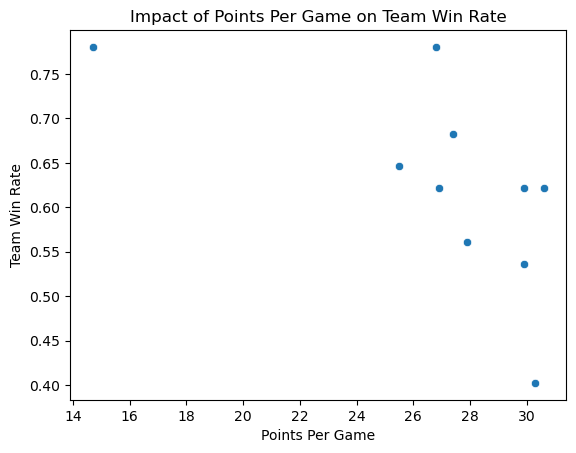

In [130]:
# Plotting the top players' performance against team wins
sns.scatterplot(x='PTS_x', y='Win_Rate', data=final_df)
plt.title('Impact of Points Per Game on Team Win Rate')
plt.xlabel('Points Per Game')
plt.ylabel('Team Win Rate')
plt.show()


In [132]:
# Calculate the correlation coefficients
correlation_ws = final_df['WS_x'].corr(final_df['Win_Rate'])
correlation_per = final_df['PER'].corr(final_df['Win_Rate'])

print("Correlation between Win Shares and Win Rate:", correlation_ws)
print("Correlation between Player Efficiency Rating and Win Rate:", correlation_per)


Correlation between Win Shares and Win Rate: 0.032946632794865795
Correlation between Player Efficiency Rating and Win Rate: -0.325849056549046


In [134]:
import statsmodels.api as sm

# Assume final_df already has 'WS', 'PER', and 'Win_Rate' calculated
X = final_df[['WS_x', 'PER']]  # You might want to include more metrics
y = final_df['Win_Rate']

# Adding a constant for the intercept
X = sm.add_constant(X)

# Build and fit the model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Win_Rate   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.8294
Date:                Sat, 27 Apr 2024   Prob (F-statistic):              0.475
Time:                        18:56:37   Log-Likelihood:                 9.2606
No. Observations:                  10   AIC:                            -12.52
Df Residuals:                       7   BIC:                            -11.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8166      0.241      3.390      0.0

C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


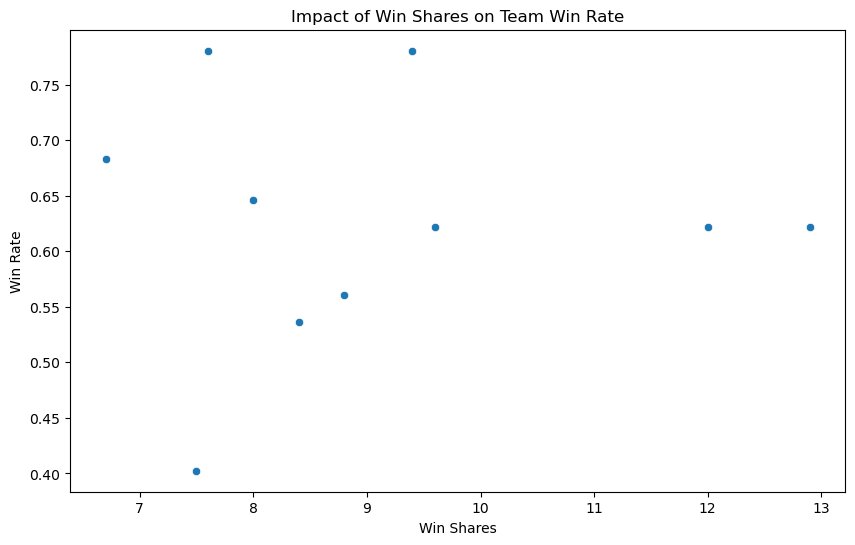

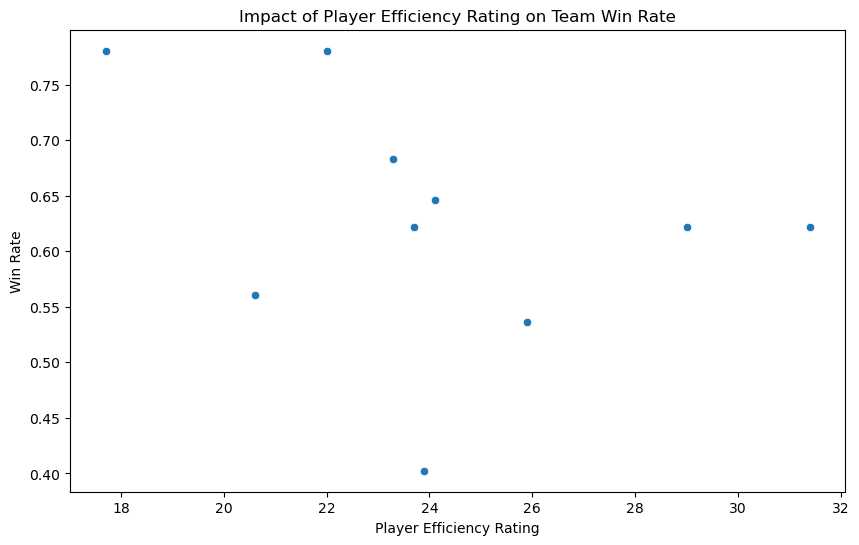

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the relationship between Win Shares and Win Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WS_x', y='Win_Rate', data=final_df)
plt.title('Impact of Win Shares on Team Win Rate')
plt.xlabel('Win Shares')
plt.ylabel('Win Rate')
plt.show()

# Visualizing the relationship between PER and Win Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PER', y='Win_Rate', data=final_df)
plt.title('Impact of Player Efficiency Rating on Team Win Rate')
plt.xlabel('Player Efficiency Rating')
plt.ylabel('Win Rate')
plt.show()
